In [1]:
# !pip install pandas
# !pip install matplotlib
# !pip install openpyxl

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Παράδειγμα δημιουργίας pivot table με Python και pandas

In [3]:
# Φόρτωση δεδομένων από αρχείο excel

df = pd.read_excel('supermarket_sales.xlsx', engine='openpyxl')
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46:00,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16:00,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22:00,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33:00,Cash,65.82,4.761905,3.2910,4.1


## Pivot table

In [4]:
df = df[['Gender', 'Product line', 'Total']]
df

,Gender,Product line,Total
0,Female,Health and beauty,548.9715
1,Female,Electronic accessories,80.2200
2,Male,Home and lifestyle,340.5255
3,Male,Health and beauty,489.0480
4,Male,Sports and travel,634.3785
...,...,...,...
995,Male,Health and beauty,42.3675
996,Female,Home and lifestyle,1022.4900
997,Male,Food and beverages,33.4320
998,Male,Home and lifestyle,69.1110


In [5]:
pivot_table = df.pivot_table(index='Gender', columns='Product line', values='Total', aggfunc='sum')
pivot_table

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Gender,,,,,,
Female,27102.0225,30437.400,33170.9175,18560.9865,30036.8775,28574.7210
Male,27235.5090,23868.495,22973.9265,30632.7525,23825.0355,26548.1055


In [6]:
# Εξαγωγή σε αρχείο Excel

pivot_table.to_excel('pivot_table.xlsx', 'Report', startrow=4)

## Σχεδίαση γραφήματος

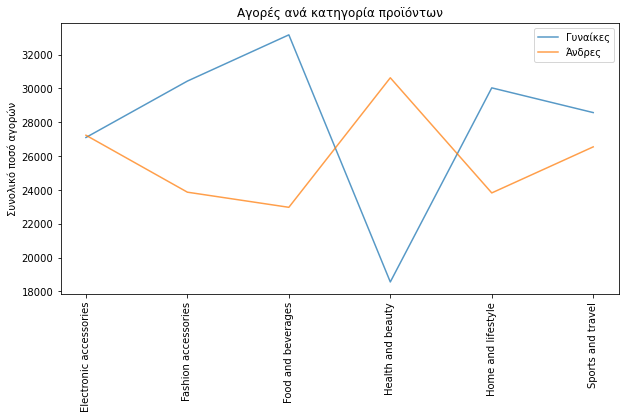

In [7]:
plt.figure(figsize=(10, 5))
pivot_table.iloc[0].plot(kind='line',alpha=0.75, rot=90)
pivot_table.iloc[1].plot(kind='line',alpha=0.75, rot=90)
plt.title('Αγορές ανά κατηγορία προϊόντων')
plt.xlabel("")
plt.ylabel("Συνολικό ποσό αγορών")
plt.legend(["Γυναίκες", "Άνδρες"]);


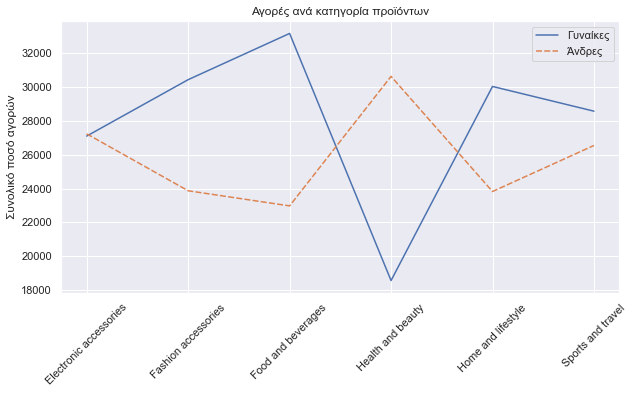

In [8]:
import seaborn as sns


plt.figure(figsize=(10, 5))

sns.set_theme(style="darkgrid")
# sns.set_theme(style="whitegrid")
# sns.set_theme(style="dark")

sns.lineplot(data = pivot_table.T,  palette = 'deep')

plt.title('Αγορές ανά κατηγορία προϊόντων')
plt.xlabel("")
plt.xticks(rotation=45)
plt.ylabel("Συνολικό ποσό αγορών")
plt.legend(["Γυναίκες", "Άνδρες"])
plt.show()